In [16]:
import pandas as pd

In [49]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [23]:
from sklearn.model_selection import train_test_split

In [61]:
from imblearn.over_sampling import SMOTE

In [25]:
# Define columns
columns = [
    "duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes", "land", "wrong_fragment", "urgent",
    "hot", "num_failed_logins", "logged_in", "num_compromised", "root_shell", "su_attempted", "num_root", "num_file_creations",
    "num_shells", "num_access_files", "num_outbound_cmds", "is_host_login", "is_guest_login", "count", "srv_count",
    "serror_rate", "srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate", "diff_srv_rate", "srv_diff_host_rate",
    "dst_host_count", "dst_host_srv_count", "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate", "dst_host_serror_rate", "dst_host_srv_serror_rate", "dst_host_rerror_rate",
    "dst_host_srv_rerror_rate", "label", "difficulty_level"
]


In [35]:
# Load the datasets
train_path = '/Users/ramejha/opt/nslkdd-dataset/KDDTrain+.txt'
test_path = '/Users/ramejha/opt/nslkdd-dataset/KDDTest+.txt'

In [37]:
train_data = pd.read_csv(train_path, names=columns)
test_data = pd.read_csv(test_path, names=columns)

In [39]:
train_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty_level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [41]:
test_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty_level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [79]:
# Check for missing values
missing_values = train_data.isnull().sum()

# Summary statistics of the dataset
summary_stats = train_data.describe(include='all')

# Class distribution
class_distribution = train_data['label'].value_counts()

missing_values, summary_stats, class_distribution

(duration                       0
 protocol_type                  0
 service                        0
 flag                           0
 src_bytes                      0
 dst_bytes                      0
 land                           0
 wrong_fragment                 0
 urgent                         0
 hot                            0
 num_failed_logins              0
 logged_in                      0
 num_compromised                0
 root_shell                     0
 su_attempted                   0
 num_root                       0
 num_file_creations             0
 num_shells                     0
 num_access_files               0
 num_outbound_cmds              0
 is_host_login                  0
 is_guest_login                 0
 count                          0
 srv_count                      0
 serror_rate                    0
 srv_serror_rate                0
 rerror_rate                    0
 srv_rerror_rate                0
 same_srv_rate                  0
 diff_srv_rate

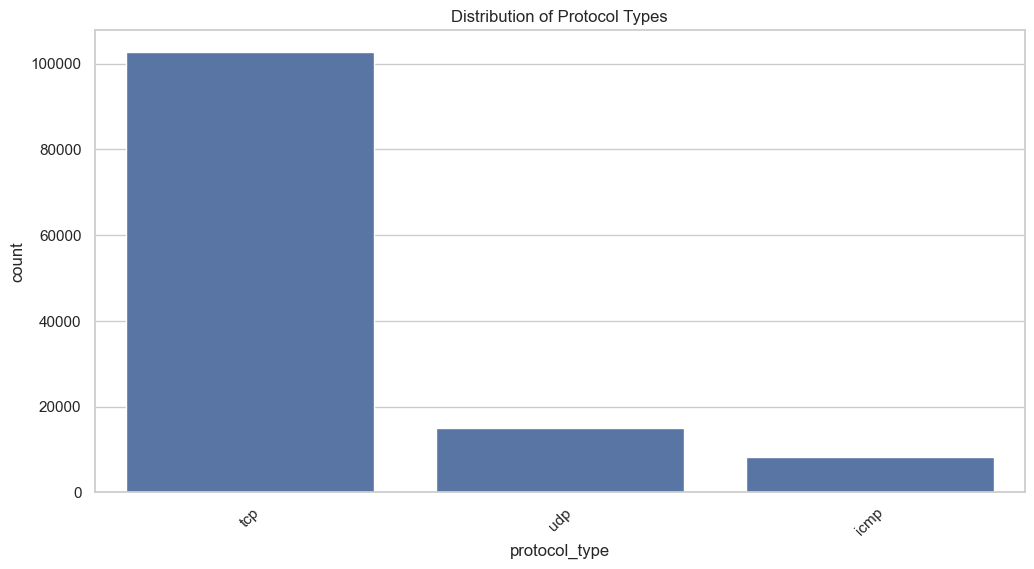

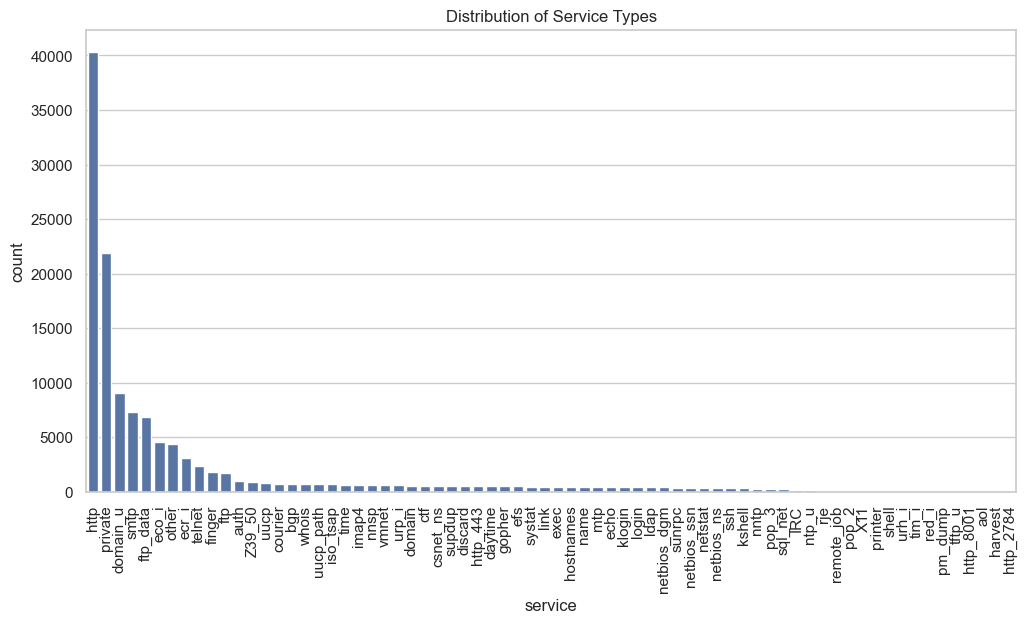

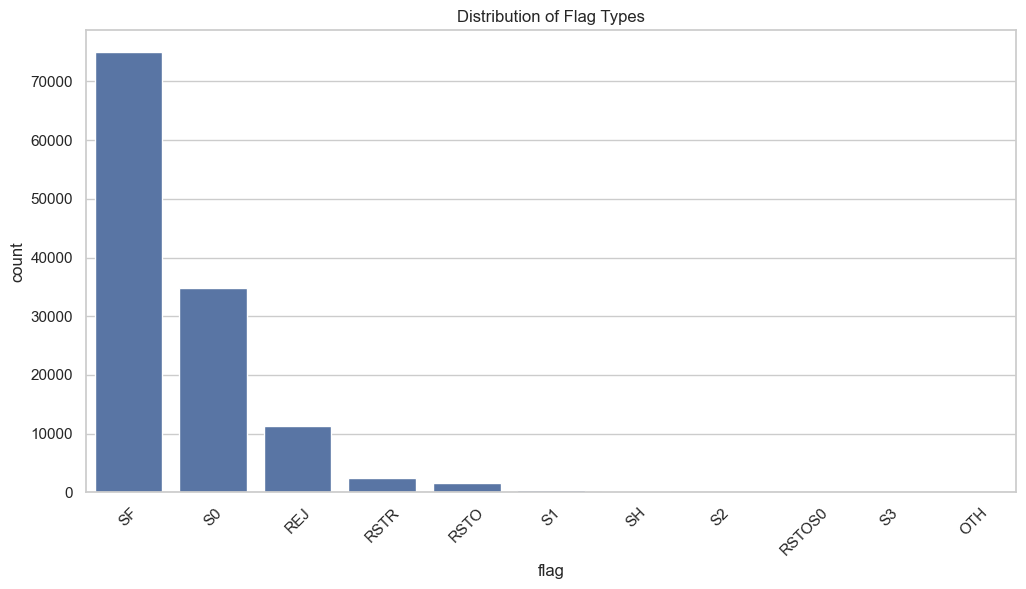

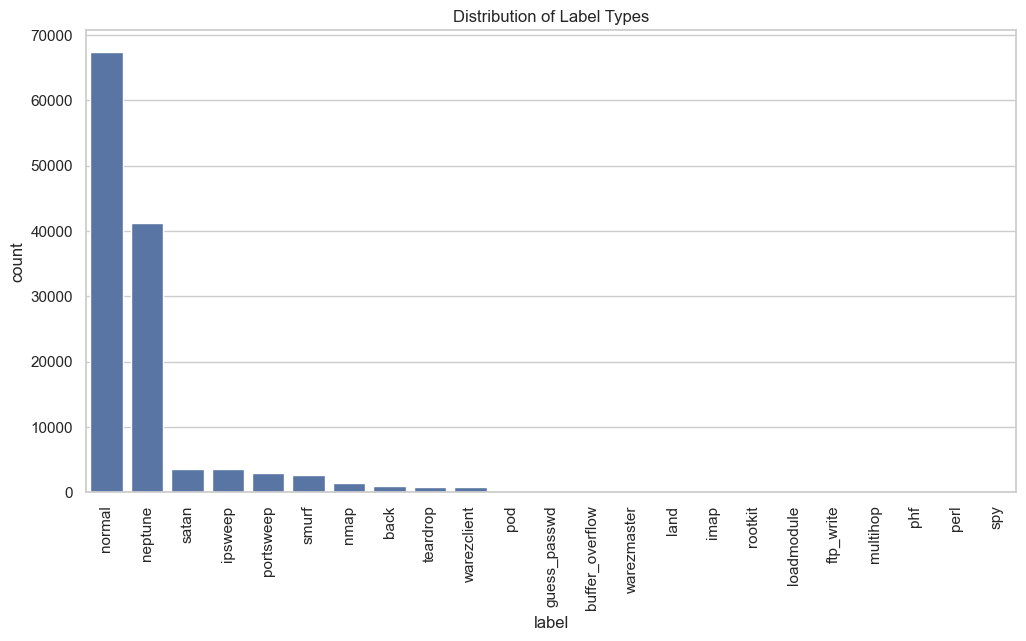

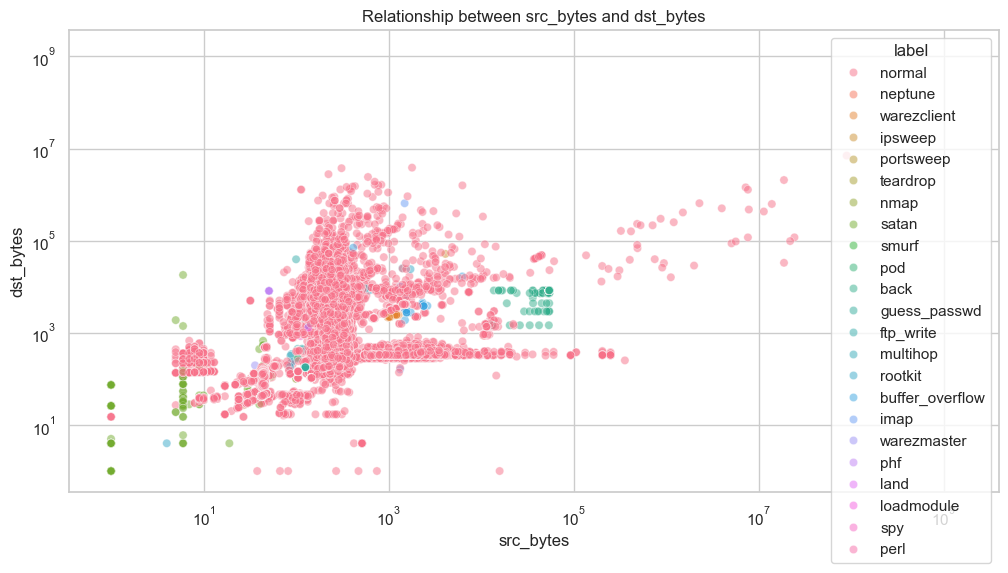

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style
sns.set(style="whitegrid")

# Plotting the distribution of protocol types
plt.figure(figsize=(12, 6))
sns.countplot(data=train_data, x='protocol_type', order=train_data['protocol_type'].value_counts().index)
plt.title('Distribution of Protocol Types')
plt.xticks(rotation=45)
plt.show()

# Plotting the distribution of services
plt.figure(figsize=(12, 6))
sns.countplot(data=train_data, x='service', order=train_data['service'].value_counts().index)
plt.title('Distribution of Service Types')
plt.xticks(rotation=90)
plt.show()

# Plotting the distribution of flag types
plt.figure(figsize=(12, 6))
sns.countplot(data=train_data, x='flag', order=train_data['flag'].value_counts().index)
plt.title('Distribution of Flag Types')
plt.xticks(rotation=45)
plt.show()

# Plotting the distribution of the label
plt.figure(figsize=(12, 6))
sns.countplot(data=train_data, x='label', order=train_data['label'].value_counts().index)
plt.title('Distribution of Label Types')
plt.xticks(rotation=90)
plt.show()

# Plotting the relationship between src_bytes and dst_bytes
plt.figure(figsize=(12, 6))
sns.scatterplot(data=train_data, x='src_bytes', y='dst_bytes', hue='label', alpha=0.5)
plt.title('Relationship between src_bytes and dst_bytes')
plt.xscale('log')
plt.yscale('log')
plt.show()


## Preprocessing Plan 1

In [43]:
# Drop the 'difficulty_level' column as it's not needed for the analysis
train_data.drop(columns=['difficulty_level'], inplace=True)
test_data.drop(columns=['difficulty_level'], inplace=True)

In [45]:
# Separate features and labels
X_train = train_data.drop(columns=['label'])
y_train = train_data['label']
X_test = test_data.drop(columns=['label'])
y_test = test_data['label']

In [51]:
# One-hot encode categorical features
categorical_features = ['protocol_type', 'service', 'flag']
encoder = OneHotEncoder(sparse_output=False)
X_train_encoded = encoder.fit_transform(X_train[categorical_features])
X_test_encoded = encoder.transform(X_test[categorical_features])

In [53]:
# Replace categorical features with encoded features
X_train = X_train.drop(columns=categorical_features)
X_test = X_test.drop(columns=categorical_features)
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(categorical_features))
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(categorical_features))

In [55]:
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
X_train = pd.concat([X_train, X_train_encoded_df], axis=1)
X_test = pd.concat([X_test, X_test_encoded_df], axis=1)

In [57]:
# Normalize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [73]:
# Split train data into train and validation sets
X_train_final, X_val, y_train_final, y_val = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)

# Verify the preprocessing steps
print("Train set shape:", X_train_final.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test_scaled.shape)

Train set shape: (100778, 122)
Validation set shape: (25195, 122)
Test set shape: (22544, 122)


In [ ]:
## Pipelining - preprocessing, resampling and model training

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

In [106]:
# Define the preprocessor
categorical_features = ['protocol_type', 'service', 'flag']
numeric_features = X_train.columns.difference(categorical_features)

In [108]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

In [110]:
# Define the SMOTE with k_neighbors set to 1
smote = SMOTE(random_state=42, k_neighbors=1)

In [112]:

# Models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

In [114]:

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
# Results dictionary to store classification reports
results = {}

for model_name, model in models.items():
    # Pipeline with preprocessing, SMOTE, and model
    clf = ImbPipeline(steps=[('preprocessor', preprocessor), ('smote', smote), ('classifier', model)])
    
    # Train the model
    clf.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = clf.predict(X_test)
    
    # Classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    results[model_name] = report

results

# Bagging (Bootstrap Aggregating)

In [129]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Verify the preprocessing steps
print("Train set shape:", X_train_final.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test_scaled.shape)

# Train a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_final, y_train_final)

# Make predictions
y_pred = rf.predict(X_val)

# Evaluate the model
print(classification_report(y_val, y_pred))

Train set shape: (100778, 122)
Validation set shape: (25195, 122)
Test set shape: (22544, 122)


/Users/ramejha/Tools/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ramejha/Tools/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                 precision    recall  f1-score   support

           back       1.00      1.00      1.00       185
buffer_overflow       1.00      0.33      0.50         9
   guess_passwd       1.00      0.91      0.95        11
           imap       1.00      1.00      1.00         1
        ipsweep       0.99      0.99      0.99       733
           land       0.00      0.00      0.00         3
        neptune       1.00      1.00      1.00      8228
           nmap       0.98      0.99      0.99       313
         normal       1.00      1.00      1.00     13422
           perl       0.00      0.00      0.00         1
            phf       1.00      1.00      1.00         1
            pod       1.00      0.93      0.96        43
      portsweep       1.00      0.99      1.00       573
        rootkit       0.00      0.00      0.00         1
          satan       1.00      0.99      0.99       738
          smurf       1.00      1.00      1.00       534
            spy       0.00    

/Users/ramejha/Tools/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Boosting

In [131]:
from sklearn.ensemble import GradientBoostingClassifier

# Train a Gradient Boosting model
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train_final, y_train_final)

# Make predictions
y_pred = gb.predict(X_val)

# Evaluate the model
print(classification_report(y_val, y_pred))

/Users/ramejha/Tools/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ramejha/Tools/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ramejha/Tools/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result

                 precision    recall  f1-score   support

           back       1.00      1.00      1.00       185
buffer_overflow       0.00      0.00      0.00         9
   guess_passwd       1.00      0.91      0.95        11
           imap       0.33      1.00      0.50         1
        ipsweep       0.99      0.99      0.99       733
           land       0.00      0.00      0.00         3
       multihop       0.00      0.00      0.00         0
        neptune       1.00      1.00      1.00      8228
           nmap       0.94      0.97      0.96       313
         normal       0.99      0.99      0.99     13422
           perl       0.00      0.00      0.00         1
            phf       1.00      1.00      1.00         1
            pod       0.17      0.91      0.29        43
      portsweep       1.00      0.99      1.00       573
        rootkit       0.00      0.00      0.00         1
          satan       1.00      0.98      0.99       738
          smurf       1.00    

/Users/ramejha/Tools/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ramejha/Tools/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Stacking
## Combining Logistic Regression, Random Forest, and Gradient Boosting

Step 1: Train multiple base models on the training data (e.g., logistic regression, random forest, gradient boosting).
Step 2: Generate predictions from each base model.
Step 3: Use these predictions as input features for a meta-model (e.g., another logistic regression or any other model).
Step 4: Train the meta-model on the predictions from the base models.
Verifying if the Benefits: Leverages the strengths of multiple models and often results in better performance.

In [135]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.base import clone
import numpy as np

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#X_train = X_train_final
#X_test = X_val
#y_train = y_train_final
#y_test = y_val


# Base models
base_models = [
    ('lr', LogisticRegression(max_iter=1000, random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42))
]

# Meta-model
meta_model = LogisticRegression(max_iter=1000, random_state=42)

# Train base models using K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
base_predictions = np.zeros((X_train.shape[0], len(base_models)))

for i, (name, model) in enumerate(base_models):
    for train_index, val_index in kf.split(X_train):
        X_fold_train, X_fold_val = X_train[train_index], X_train[val_index]
        y_fold_train, y_fold_val = y_train[train_index], y_train[val_index]
        
        cloned_model = clone(model)
        cloned_model.fit(X_fold_train, y_fold_train)
        base_predictions[val_index, i] = cloned_model.predict(X_fold_val)

# Train meta-model on base model predictions
meta_model.fit(base_predictions, y_train)

# Generate predictions for the test set
base_test_predictions = np.zeros((X_test.shape[0], len(base_models)))

for i, (name, model) in enumerate(base_models):
    cloned_model = clone(model)
    cloned_model.fit(X_train, y_train)
    base_test_predictions[:, i] = cloned_model.predict(X_test)

# Meta-model predictions
meta_predictions = meta_model.predict(base_test_predictions)

# Evaluate the stacked model
print(classification_report(y_test, meta_predictions))

KeyError: "None of [Index([     0,      1,      2,      3,      4,      5,      6,      7,      9,\n           10,\n       ...\n       100766, 100767, 100768, 100770, 100771, 100772, 100773, 100774, 100775,\n       100776],\n      dtype='int64', length=80622)] are in the [columns]"

# Graph Neural Networks (GNNs) for Intrusion Detection Systems (IDS)

To use Graph Neural Networks (GNNs) for Intrusion Detection Systems (IDS) with the NSL-KDD dataset, we need to represent the network traffic as a graph. Each node in the graph could represent an entity like an IP address or a host, and the edges could represent the interactions between these entities (e.g., network connections).

Steps to Implement GNN for IDS:
Data Preparation: Process the NSL-KDD dataset to create a graph structure.
Graph Representation: Use libraries like NetworkX to represent the data as a graph.
GNN Implementation: Use PyTorch Geometric or a similar library to implement and train the GNN.

In [147]:
import pandas as pd
import networkx as nx
from torch_geometric.utils import from_networkx
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from sklearn.preprocessing import LabelEncoder


In [149]:
# Load the NSL-KDD dataset
column_names = [
    "duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes", "land", "wrong_fragment",
    "urgent", "hot", "num_failed_logins", "logged_in", "num_compromised", "root_shell", "su_attempted",
    "num_root", "num_file_creations", "num_shells", "num_access_files", "num_outbound_cmds", "is_host_login",
    "is_guest_login", "count", "srv_count", "serror_rate", "srv_serror_rate", "rerror_rate", "srv_rerror_rate",
    "same_srv_rate", "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count",
    "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate", "dst_host_serror_rate", "dst_host_srv_serror_rate", "dst_host_rerror_rate",
    "dst_host_srv_rerror_rate", "label"
]
data = pd.read_csv(train_path, header=None, names=column_names)

In [151]:
# Encode the labels
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['label'])


In [155]:
# Create a graph using NetworkX
G = nx.Graph()

# Define the set of attributes to ensure all nodes have the same attributes
default_attributes = {'duration': 0, 'src_bytes': 0, 'dst_bytes': 0}



In [157]:
# Add nodes with features
for index, row in data.iterrows():
    G.add_node(index, duration=row['duration'], src_bytes=row['src_bytes'], dst_bytes=row['dst_bytes'])



In [159]:
# Add edges (for simplicity, connecting consecutive rows, you may use a more meaningful connection)
for index in range(len(data) - 1):
    G.add_edge(index, index + 1)



In [161]:
# Ensure all nodes have the same attributes
for node in G.nodes():
    for attr in default_attributes:
        if attr not in G.nodes[node]:
            G.nodes[node][attr] = default_attributes[attr]



In [163]:
# Convert to a PyTorch Geometric graph
graph_data = from_networkx(G)

# Extract features and labels from the original dataframe
graph_data.x = torch.tensor(data[['duration', 'src_bytes', 'dst_bytes']].values, dtype=torch.float)
graph_data.y = torch.tensor(data['label'].values, dtype=torch.long)

TypeError: can't convert np.ndarray of type numpy.object_. The only supported types are: float64, float32, float16, complex64, complex128, int64, int32, int16, int8, uint64, uint32, uint16, uint8, and bool.

In [175]:
data[["duration", "src_bytes", "dst_bytes"]]

,duration,src_bytes,dst_bytes
0,tcp,0,0
0,udp,0,0
0,tcp,0,0
0,tcp,8153,0
0,tcp,420,0
...,...,...,...
0,tcp,0,0
8,udp,145,0
0,tcp,384,0
0,tcp,0,0


In [ ]:
# Define a simple GNN model
class GNN(torch.nn.Module):
    def __init__(self):
        super(GNN, self).__init__()
        self.conv1 = GCNConv(graph_data.num_node_features, 16)
        self.conv2 = GCNConv(16, len(label_encoder.classes_))

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

# Split the data into training and testing sets
train_mask = torch.rand(graph_data.num_nodes) < 0.8
test_mask = ~train_mask

In [ ]:
# Train the GNN model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GNN().to(device)
graph_data = graph_data.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)



In [ ]:
for epoch in range(200):
    model.train()
    optimizer.zero_grad()
    out = model(graph_data)
    loss = F.nll_loss(out[train_mask], graph_data.y[train_mask])
    loss.backward()
    optimizer.step()
    print(f'Epoch {epoch+1}, Loss: {loss.item()}')



In [ ]:
# Evaluate the GNN model
model.eval()
_, pred = model(graph_data).max(dim=1)
correct = pred[test_mask].eq(graph_data.y[test_mask]).sum().item()
accuracy = correct / test_mask.sum().item()
print(f'Accuracy: {accuracy:.4f}')